# Hands on timeseries analysis
### part2 : Handling timeseries data using pandas

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div> 

<div style="text-align: right"> Initial upload: 2020.07.20 </div> 
<div style="text-align: right"> Last update: 2020.07.26 </div> 

This is a basic tutorial for timesseries analysis. In this tutorial, you will learn how to read, modify, visualize, and analyze timeseries data.

### 0. Library import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

pd.set_option('display.max_rows', 500)

### 1. read_csv()로 데이터 읽어오기

애플 주식 데이터 읽기

In [2]:
url = 'https://raw.githubusercontent.com/sguys99/datasets/master/apple_stock.csv'
stock = pd.read_csv(url)

In [3]:
stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


컬럼의 데이터 타입 확인하기

In [4]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2265 non-null   object 
 1   High       2265 non-null   float64
 2   Low        2265 non-null   float64
 3   Open       2265 non-null   float64
 4   Close      2265 non-null   float64
 5   Volume     2265 non-null   float64
 6   Adj Close  2265 non-null   float64
dtypes: float64(6), object(1)
memory usage: 124.0+ KB


- `Date` 컬럼의 데이터 타입이 문자열이다.

### 2. Datetime 인덱스 생성하기

`Date` 컬럼의 데이터 타입을 `datetime`으로 변경한다.  
`pandas`의 `to_datetime` 메서드를 사용한다.

In [5]:
stock['Date'] = stock['Date'].apply(pd.to_datetime)

In [6]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2265 non-null   datetime64[ns]
 1   High       2265 non-null   float64       
 2   Low        2265 non-null   float64       
 3   Open       2265 non-null   float64       
 4   Close      2265 non-null   float64       
 5   Volume     2265 non-null   float64       
 6   Adj Close  2265 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 124.0 KB


`Date`컬럼을 인덱스로 설정한다.

In [7]:
stock = stock.set_index('Date')

In [8]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


**또 다른 방법** : 날짜 컬럼을 알고있다면...

In [9]:
# 시간형식을 지정하는 함수
def dateparser(str_dt):
    return datetime.datetime.strptime(str_dt, "%Y-%m-%d")
    #문자열을 받아 datetime으로 변환, 1장 참고

In [10]:
# 잘 되는지 시험
dateparser('2019-01-01')

datetime.datetime(2019, 1, 1, 0, 0)

In [11]:
stock_rev = pd.read_csv(url, index_col = 'Date', parse_dates=['Date'],
                       date_parser=dateparser)

In [12]:
stock_rev.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [13]:
stock_rev.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2265 entries, 2009-12-31 to 2018-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2265 non-null   float64
 1   Low        2265 non-null   float64
 2   Open       2265 non-null   float64
 3   Close      2265 non-null   float64
 4   Volume     2265 non-null   float64
 5   Adj Close  2265 non-null   float64
dtypes: float64(6)
memory usage: 123.9 KB


In [14]:
del stock_rev

### 3. groupby를 활용한 row 재조합

월별 합계 데이터로 재조합 한다.  
먼저 `month`컬럼을 생성하고, 이 컬럼을 기준으로 groupby를 실행하여 재조합한다.

'month' 컬럼 생성하기  
앞에서 `datetime` 타입은 `.year`, `.month`, `.day` 등의 메서드를 사용하여 일부 정보를 추출할 수 있다고 하였다.

In [15]:
stock['month'] = stock.index.month

In [16]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,1
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,1
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,1


월별 합계 데이터로 재조합 하기

In [17]:
stock.groupby('month').sum()

,High,Low,Open,Close,Volume,Adj Close
month,,,,,,
1,16141.351418,15840.451458,16007.617104,15989.401403,1.748822e+10,14038.491524
2,15739.942860,15445.045748,15572.844261,15607.478556,1.511651e+10,13799.143261
3,18676.318544,18358.607164,18522.812897,18516.759998,1.646522e+10,16387.278601
4,17763.422855,17444.350006,17612.804337,17595.992851,1.656252e+10,15549.686649
5,18874.642849,18552.902849,18711.531479,18731.747120,1.595049e+10,16741.255772
6,19040.630035,18743.354290,18909.838608,18881.168510,1.427367e+10,16927.685444
7,18908.574245,18616.531422,18760.998562,18775.181419,1.403693e+10,16779.291849
8,21322.417149,20943.891430,21113.692909,21152.527245,1.505109e+10,19060.226547
9,19596.267178,19222.517181,19423.325752,19400.800022,1.547466e+10,17478.810833


같은 방법으로 연도별 합계 데이터로 재조합 하기

In [18]:
stock.groupby(stock.index.year).sum()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


각 연도의 월별 합계 데이터 구하기

In [19]:
stock.groupby([stock.index.year, stock.index.month]).sum()

High          Low         Open        Close        Volume  \
Date Date                                                                     
2009 12      30.478571    30.080000    30.447144    30.104286  8.810270e+07   
2010 1      573.331425   557.244289   568.397141   563.798571  3.792249e+09   
     2      544.092857   532.875715   537.678570   539.588568  2.694020e+09   
     3      738.235716   727.080000   732.047146   734.064285  3.038543e+09   
     4      759.410004   744.359997   753.004292   753.445721  3.091782e+09   
     5      730.337135   699.494276   719.941429   718.461422  4.520664e+09   
     6      832.535709   812.074276   824.641434   820.742855  4.162813e+09   
     7      775.377140   753.262863   766.438568   764.849998  3.917426e+09   
     8      797.491417   783.245712   790.775719   789.872864  2.397280e+09   
     9      827.359993   811.739990   818.522850   821.552849  2.962480e+09   
     10     909.855713   893.007137   901.279999   902.802849  3.058644e+09   
     11     941.915722   926.407131   934.340004   934.764286  2.377022e+09   
     12    1015.334286  1005.722858  1011.407139  1010.384293  1.743309e+09   
2011 1      973.799992   955.328583   964.618561   966.800003  2.710384e+09   
     2      958.600002   944.887138   950.895706   953.210007  2.323987e+09   
     3     1151.114277  1131.195709  1143.562855  1141.755714  2.826615e+09   
     4      981.997139   965.321423   975.171432   972.615704  2.313457e+09   
     5     1032.851433  1018.240005  1025.958569  1025.354282  1.728015e+09   
     6     1051.567142  1031.604290  1043.190010  1040.541424  2.315963e+09   
     7     1071.921425  1050.395718  1058.758564  1063.537140  2.663487e+09   
     8     1254.649998  1219.489994  1239.569992  1237.934288  4.035650e+09   
     9     1191.664288  1164.200008  1177.138565  1177.480000  2.994362e+09   
     10    1205.449989  1174.577141  1190.231430  1191.690002  3.285357e+09   
     11    1166.638569  1145.058582  1158.804287  1154.445717  2.240925e+09   
     12    1186.994286  1170.418564  1178.311428  1178.791431  1.576633e+09   
2012 1     1231.452858  1216.601433  1225.028564  1224.508568  1.714964e+09   
     2     1430.997147  1404.107147  1413.722862  1421.631432  2.842139e+09   
     3     1829.345703  1792.201431  1812.982857  1815.024284  3.896084e+09   
     4     1758.535728  1710.428566  1741.735703  1731.437141  3.899748e+09   
     5     1798.158585  1754.962852  1778.181435  1774.687134  2.776586e+09   
     6     1736.667137  1707.640007  1723.982849  1723.687134  1.963956e+09   
     7     1814.762848  1784.041435  1798.830002  1803.204292  2.227413e+09   
     8     2124.724297  2093.454285  2107.877151  2111.715714  2.069052e+09   
     9     1864.735718  1835.115723  1851.464294  1849.971443  2.299751e+09   
     10    1930.951424  1884.641434  1916.001450  1904.142845  3.035708e+09   
     11    1717.104286  1671.227142  1701.115715  1693.037148  3.232463e+09   
     12    1542.042870  1499.905708  1523.817146  1520.157135  3.033188e+09   
2013 1     1513.222855  1478.909996  1500.250000  1493.467144  3.280856e+09   
     2     1257.341438  1227.145725  1244.510006  1239.910015  2.336008e+09   
     3     1276.581413  1249.537151  1262.890015  1262.402851  2.294219e+09   
     4     1337.452854  1303.412857  1319.267132  1319.261421  2.740872e+09   
     5     1419.497150  1387.557140  1402.974285  1403.137150  2.361883e+09   
     6     1232.201431  1205.865719  1222.748573  1215.822853  1.754634e+09   
     7     1359.852852  1335.421432  1345.951424  1348.779999  1.634529e+09   
     8     1537.861420  1509.661430  1521.330002  1523.794281  2.014585e+09   
     9     1388.307137  1362.461414  1379.349998  1371.955711  2.157735e+09   
     10    1671.531418  1641.354286  1656.488579  1658.447144  1.959433e+09   
     11    1508.085709  1486.351418  1494.908569  1498.904282  1.306289e+09   
     12    1693.065704  1669.217125  1681.944298  1678.972839  1.764

### 4. resampling을 활용한 row 재조합

`resample` 메서드를 사용하면, 시계열 재조합을 더 용이하게 할 수 있다.  
단, `rule` 인자를 사용해야 한다.

freq 관련 주요 인자는 다음과 같다.  [[참고자료]](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
- H: 시간(hour)
- D: 일(day)
- B: 주말이 아닌 평일
- W: 주(일요일)
- M: 각 달(month)의 마지막 날
- MS: 각 달의 첫날
- BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
- BMS: 주말이 아닌 평일 중에서 각 달의 첫날
- A, Y: 각 연도(year)의 마지막날

연도별 평균 구하기

In [20]:
stock.resample(rule = 'A').mean() # annual

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12.000000
2010-12-31,37.481258,36.692517,37.136803,37.120351,1.498263e+08,24.858119,6.583333
2011-12-31,52.489082,51.471100,52.008775,52.000618,1.230747e+08,34.822880,6.547619
2012-12-31,83.117914,81.417309,82.378960,82.292817,1.319642e+08,56.076387,6.500000
2013-12-31,68.234132,66.892443,67.589734,67.519269,1.016087e+08,53.083607,6.543651
2014-12-31,93.012664,91.475538,92.219830,92.264654,6.315273e+07,84.295298,6.551587
2015-12-31,121.244524,118.863095,120.175754,120.040000,5.183789e+07,112.931425,6.567460
2016-12-31,105.427183,103.690278,104.507778,104.604008,3.841516e+07,100.449894,6.555556
2017-12-31,151.406056,149.487650,150.444900,150.551075,2.713317e+07,147.299024,6.533865


custom resampling : `sum`, `mean` 대신 임의의 기준으로 row를 조합하고자 할 때  
ex) 매년 첫째날 데이터로 표시

In [21]:
#샘플의 첫째날을 리턴하는 함수
def first_day(values):
    return values[0]

In [22]:
stock.resample(rule = 'A').apply(first_day)

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688,1
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778,1
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737,1
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503,1
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631,1
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850,1
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964,1


'Open' 컬럼에서 월별 최대 값으로 재조합하기

In [23]:
stock['Open'].resample('M').max()

Date
2009-12-31     30.447144
2010-01-31     30.701429
2010-02-28     29.170000
2010-03-31     33.799999
2010-04-30     38.840000
2010-05-31     37.691429
2010-06-30     39.669998
2010-07-31     37.869999
2010-08-31     37.548573
2010-09-30     41.997143
2010-10-31     45.495716
2010-11-30     45.864285
2010-12-31     46.602856
2011-01-31     49.764286
2011-02-28     51.542858
2011-03-31     51.628571
2011-04-30     50.714287
2011-05-31     49.962856
2011-06-30     49.838570
2011-07-31     57.227142
2011-08-31     56.825714
2011-09-30     59.948570
2011-10-31     60.251427
2011-11-30     57.458572
2011-12-31     58.127144
2012-01-31     65.084282
2012-02-29     77.365715
2012-03-31     88.339996
2012-04-30     91.418571
2012-05-31     84.357140
2012-06-30     84.029999
2012-07-31     88.281425
2012-08-31     97.141426
2012-09-30    100.344284
2012-10-31     95.892860
2012-11-30     85.459999
2012-12-31     84.807144
2013-01-31     79.117142
2013-02-28     68.501427
2013-03-31     66.49

### 5. shifting을 사용한 lead, lag 컬럼 추가  
- pandas는 시계열 데이터의 이전 스텝, 또는 이후 스텝의 값을 취하는 매서드를 제공한다.

In [24]:
url = 'https://raw.githubusercontent.com/sguys99/datasets/master/apple_stock.csv'
stock = pd.read_csv(url, index_col = 'Date', parse_dates=['Date'],
                       date_parser=dateparser)

In [25]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


먼저 기존 numpy의 인덱스를 사용한 방법을 설명한다. : `adj Close`(종가)의 1step forward 값을 구하기

In [26]:
stock_test = stock.copy()

In [27]:
temp = stock_test['Adj Close'].values

In [28]:
temp

array([ 20.15971947,  20.47350311,  20.5089016 , ..., 156.1499939 ,
       156.22999573, 157.74000549])

In [29]:
stock_test.loc["2010-01-04":, 'Adj Close(yesterday)'] = temp[:-1] #마지막날 전날까지 의 종가

In [30]:
stock_test.head()

,High,Low,Open,Close,Volume,Adj Close,Adj Close(yesterday)
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,NaN
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,20.159719
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,20.473503
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,20.508902
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,20.182680


In [31]:
stock_test.tail()

,High,Low,Open,Close,Volume,Adj Close,Adj Close(yesterday)
Date,,,,,,,
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002,150.729996
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998,146.830002
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994,157.169998
2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996,156.149994
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005,156.229996


반대로 1step backward 값을 구해본다.

In [32]:
stock_test.loc[:"2018-12-28", 'Adj Close(tomorrow)'] = temp[1:]

In [33]:
stock_test.tail()

,High,Low,Open,Close,Volume,Adj Close,Adj Close(yesterday),Adj Close(tomorrow)
Date,,,,,,,,
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002,150.729996,157.169998
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998,146.830002,156.149994
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994,157.169998,156.229996
2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996,156.149994,157.740005
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005,156.229996,NaN


In [34]:
del stock_test

- 인덱스를 사용해서 가능하지만 번거롭다.

shift 매서드 사용하기 : shift forward

In [35]:
stock['Adj Close(yesterday)'] = stock['Adj Close'].shift(1)

In [36]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close,Adj Close(yesterday)
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,NaN
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,20.159719
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,20.473503
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,20.508902
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,20.182680


shift backward

In [37]:
stock['Adj Close(tomorrow)'] = stock['Adj Close'].shift(-1)

In [38]:
stock.tail()

,High,Low,Open,Close,Volume,Adj Close,Adj Close(yesterday),Adj Close(tomorrow)
Date,,,,,,,,
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002,150.729996,157.169998
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998,146.830002,156.149994
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994,157.169998,156.229996
2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996,156.149994,157.740005
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005,156.229996,NaN


데이터 프레인 전체 shift

In [39]:
stock.shift(1)

,High,Low,Open,Close,Volume,Adj Close,Adj Close(yesterday),Adj Close(tomorrow)
Date,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,NaN,20.473503
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,20.159719,20.508902
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,20.473503,20.182680
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,20.508902,20.145369
...,...,...,...,...,...,...,...,...
2018-12-24,158.160004,149.630005,156.860001,150.729996,95744600.0,150.729996,156.830002,146.830002
2018-12-26,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002,150.729996,157.169998
2018-12-27,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998,146.830002,156.149994


In [40]:
stock.shift(-1).tail()

,High,Low,Open,Close,Volume,Adj Close,Adj Close(yesterday),Adj Close(tomorrow)
Date,,,,,,,,
2018-12-24,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998,146.830002,156.149994
2018-12-26,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994,157.169998,156.229996
2018-12-27,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996,156.149994,157.740005
2018-12-28,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005,156.229996,NaN
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
stock.shift(3).head(10)

,High,Low,Open,Close,Volume,Adj Close,Adj Close(yesterday),Adj Close(tomorrow)
Date,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,NaN,20.473503
2010-01-07,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,20.159719,20.508902
2010-01-08,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,20.473503,20.182680
2010-01-11,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,20.508902,20.145369
2010-01-12,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,20.182680,20.279305
2010-01-13,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305,20.145369,20.100410


In [42]:
stock.shift(-3).tail(10)

,High,Low,Open,Close,Volume,Adj Close,Adj Close(yesterday),Adj Close(tomorrow)
Date,,,,,,,,
2018-12-17,162.110001,155.300003,160.399994,156.830002,64773000.0,156.830002,160.889999,150.729996
2018-12-18,158.160004,149.630005,156.860001,150.729996,95744600.0,150.729996,156.830002,146.830002
2018-12-19,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002,150.729996,157.169998
2018-12-20,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998,146.830002,156.149994
2018-12-21,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994,157.169998,156.229996
2018-12-24,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996,156.149994,157.740005
2018-12-26,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005,156.229996,NaN
2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
stock = stock.drop(labels = ['Adj Close(yesterday)', 'Adj Close(tomorrow)'], axis = 1)

freq 옵션을 사용하여 shift 시키기

In [44]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [45]:
stock.shift(freq='D', periods=1).head() # 1일 기준으로 shft forward

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-01,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-08,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [46]:
stock.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005


In [47]:
stock.shift(freq='D', periods=-1).tail() # 1일 기준으로 shft forward

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-23,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-25,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-26,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-27,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996
2018-12-30,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005


In [48]:
stock.shift(freq='M', periods=1).head(10) # 1달 마지막일 shft forward

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-31,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-31,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-31,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
2010-01-31,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305
2010-01-31,30.428572,29.778572,30.400000,30.015715,115557400.0,20.100410
2010-01-31,29.967142,29.488571,29.884285,29.674286,148614900.0,19.871763
2010-01-31,30.132856,29.157143,29.695715,30.092857,151473000.0,20.152065


### 6. rolling & expanding  
- 시계열 데이터를 분석할 때 이동평균(moving average)을 자주 살펴본다. pandas는 설정한 윈도우 크기만큼 구간을 옮겨가며 평균이나 합 등을 계산하는 기능(rolling)을 제공한다. 

In [49]:
url = 'https://raw.githubusercontent.com/sguys99/datasets/master/apple_stock.csv'
stock = pd.read_csv(url, index_col = 'Date', parse_dates=['Date'],
                       date_parser=dateparser)

rolling.mean() : moving average, 이동 평균값 구하기

In [50]:
stock['MA_Close(5)'] = stock['Close'].rolling(window=5).mean() # 5일 이동평균

In [51]:
stock.head(10)

,High,Low,Open,Close,Volume,Adj Close,MA_Close(5)
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,NaN
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,NaN
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,NaN
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,NaN
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,30.304857
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305,30.340571
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,20.100410,30.229143
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,19.871763,30.038857
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,20.152065,30.029715


In [52]:
stock['MA_Close(20)'] = stock['Close'].rolling(window=20).mean() # 20일 이동평균

In [53]:
stock.head(30)

,High,Low,Open,Close,Volume,Adj Close,MA_Close(5),MA_Close(20)
Date,,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,NaN,NaN
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,NaN,NaN
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,NaN,NaN
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,NaN,NaN
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,30.304857,NaN
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305,30.340571,NaN
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,20.100410,30.229143,NaN
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,19.871763,30.038857,NaN
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,20.152065,30.029715,NaN


In [54]:
stock['MA_Close(20)'] = stock['Close'].rolling(window=20, min_periods = 5).mean() 
# min_periods : 연산에 사용할 최소 샘플 수, 위에서는 샘플이 5개면 5개에 대한 평균을 구함

In [55]:
stock.head(10)

,High,Low,Open,Close,Volume,Adj Close,MA_Close(5),MA_Close(20)
Date,,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,NaN,NaN
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,NaN,NaN
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,NaN,NaN
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,NaN,NaN
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,30.304857,30.304857
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305,30.340571,30.301190
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,20.100410,30.229143,30.260408
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,19.871763,30.038857,30.187143
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,20.152065,30.029715,30.176667


expanding.mean() : rolling.mean()과 다르게 window를 이동시키지 안고 기준지점에서 구간을 계속 넓혀 가면서 평균을 계산   
추세선으로 사용할 수 있음

In [56]:
stock['EP_Close'] = stock['Close'].expanding(min_periods = 1).mean()

In [57]:
stock.head(10)

,High,Low,Open,Close,Volume,Adj Close,MA_Close(5),MA_Close(20),EP_Close
Date,,,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,NaN,NaN,30.104286
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,NaN,NaN,30.338572
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,NaN,NaN,30.434285
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,NaN,NaN,30.360357
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,30.304857,30.304857,30.304857
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305,30.340571,30.301190,30.301190
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,20.100410,30.229143,30.260408,30.260408
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,19.871763,30.038857,30.187143,30.187143
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,20.152065,30.029715,30.176667,30.176667


**plotting 해보기** : 종가(Close), 5일 평균(MA_Close(5)), 20일 평균(MA_Close(20)), 추세선(EP_Close)를 그려본다.

<Axes: xlabel='Date'>

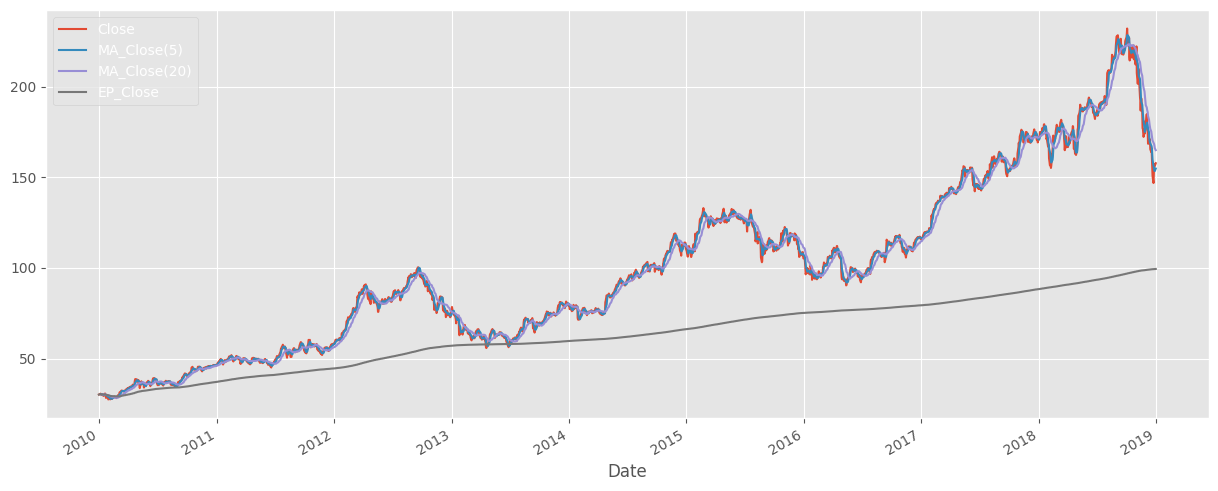

In [58]:
stock[['Close', 'MA_Close(5)', 'MA_Close(20)', 'EP_Close']].plot(figsize = (15, 6))

<Axes: xlabel='Date'>

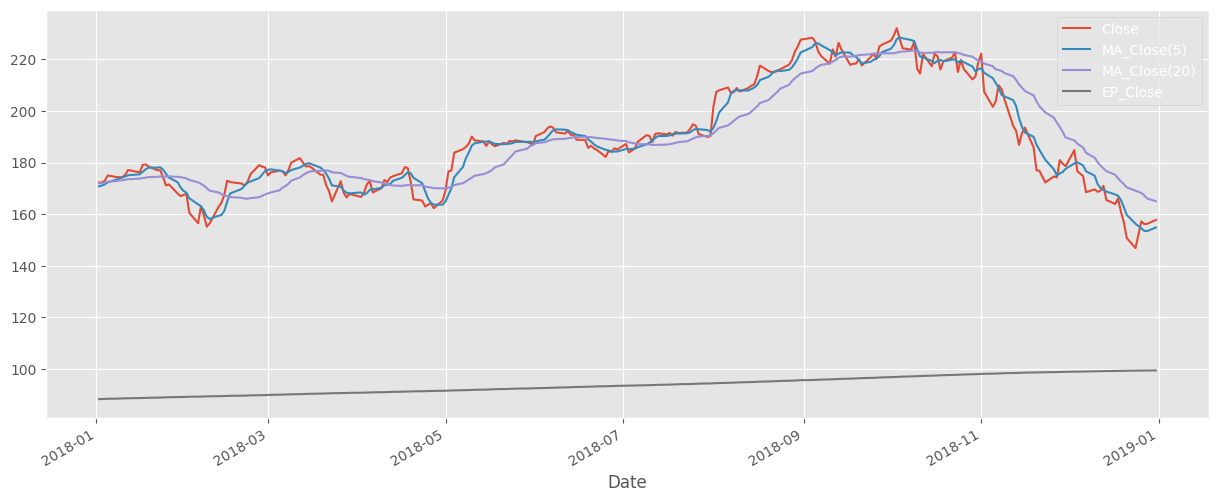

In [59]:
# 일부 구간(2018년 이후) 만 그리기
stock['2018':][['Close', 'MA_Close(5)', 'MA_Close(20)', 'EP_Close']].plot(figsize = (15, 6))